In [2]:
from IPython.display import HTML
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams.update({'font.size': 16})

In [64]:
x = np.linspace(0, 4, 1000)
ts = np.linspace(0, 4, 100)
def sig(t):
    return np.exp(-(t-x)**2)*np.cos(2*2*np.pi*(t-x))
def sig(t):
    s = np.zeros_like(x)
    s[np.abs(t-x+0.1)<0.1] = 1
    return s
def sig_msg(t):
    return sig(t) - sig(t+0.2) + sig(t+0.4) + sig(t+0.6) - sig(t+0.8)

In [65]:
order = 10  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

In [66]:
order = 6  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
ripple_db = 3  # Maximum ripple allowed below unity gain in passband (in dB)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.cheby1(order, ripple_db, normal_cutoff, btype='low', analog=False)

In [67]:
order = 10  # Filter order
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency (half of sampling frequency)
normal_cutoff = cutoff_freq / nyquist_freq
b, a = signal.bessel(order, normal_cutoff, btype='low', analog=False)

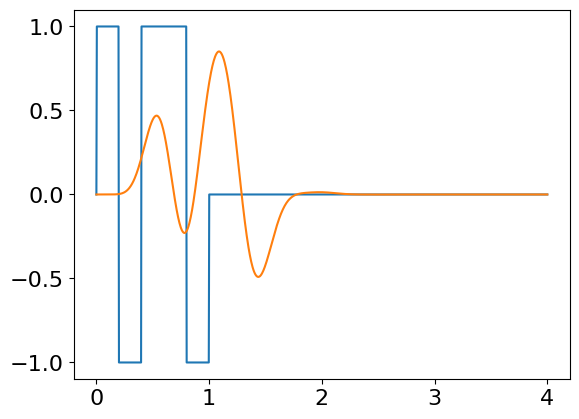

In [68]:
filtered_sig = lambda t: signal.lfilter(b, a, sig_msg(t))
fig, ax = plt.subplots()
ax.plot(x, sig_msg(0), label='Original signal')
ax.plot(x, filtered_sig(0), label='Filtered signal')
plt.show()

In [11]:
R = 50
w_p = 2*np.pi*100e3
C = np.array([0.2175, 0.8826])
L = np.array([2.4524, 3.1868])
C = C/(w_p*R)
L = L/(w_p)*R

In [13]:
C*1e9, L*1e6

(array([ 6.92324002, 28.09403055]), array([195.15579122, 253.59748632]))

In [16]:
n = np.arange(1,5)
wc = 1/np.sqrt(10**(1/(10*n))-1)

In [17]:
wc

array([1.96522673, 2.86277516, 3.54051266, 4.10811101])